In [1]:
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
from cprior.models.exponential import ExponentialModel
from cprior.models.exponential import ExponentialMVTest
from cprior.experiment.base import Experiment

In [3]:
modelA = ExponentialModel(name="control", shape=0.001, rate=0.001)
modelB = ExponentialModel(name="variation", shape=0.001, rate=0.001)
modelC = ExponentialModel(name="variation", shape=0.001, rate=0.001)
modelD = ExponentialModel(name="variation", shape=0.001, rate=0.001)

mvtest = ExponentialMVTest({"A": modelA, "B": modelB, "C": modelC, "D": modelD})

In [4]:
experiment = Experiment(name="ARPU", test=mvtest, stopping_rule="expected_loss",
                        epsilon=1e-5, min_n_samples=200, max_n_samples=None)

Describe

In [5]:
experiment.describe()

  Experiment: ARPU
    Bayesian model:             exponential-gamma
    Number of variants:                         4

    Options:
      stopping rule                 expected_loss
      epsilon                             0.00001
      min_n_samples                           200
      max_n_samples                       not set

    Priors:

         shape   rate
      A  0.001  0.001
      B  0.001  0.001
      C  0.001  0.001
      D  0.001  0.001
  -------------------------------------------------



Generate new data and update models

In [6]:
with experiment as e:
    while not e.termination:
        data_A = stats.expon(scale=0.10).rvs()
        data_B = stats.expon(scale=0.09).rvs()
        data_C = stats.expon(scale=0.07).rvs()
        data_D = stats.expon(scale=0.11).rvs()

        e.run_update(**{"A": data_A, "B": data_B, "C": data_C, "D": data_D})
        
    print(e.termination, e.status)

True winner C


Plotting

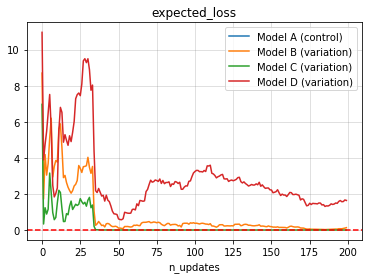

In [7]:
experiment.plot_metric()

Summary

In [8]:
experiment.summary()

,name,probability,expected_loss,improvement,probability_vs_all,expected_loss_vs_all,improvement_vs_all,n_samples
A,control,-,-,-,0.00%,6.88037,-67.66%,200
B,variation,78.63%,0.129944,7.17%,0.00%,6.02899,-54.85%,200
C,variation,100.00%,4.36533e-08,39.75%,100.00%,2.47279e-06,34.08%,200
D,variation,4.33%,1.64001,-19.31%,0.00%,8.50373,-99.04%,200


Statistics

In [9]:
experiment.stats()

,A,B,C,D
count,200.000000,200.000000,200.000000,200.000000
mean,0.097111,0.089695,0.058211,0.115288
std,0.103185,0.088274,0.058972,0.115187
min,0.002336,0.000773,0.000102,0.000322
25%,0.024968,0.024854,0.014498,0.027148
50%,0.065316,0.061481,0.038391,0.073792
75%,0.133843,0.123092,0.089266,0.175216
max,0.702451,0.540597,0.310515,0.570618


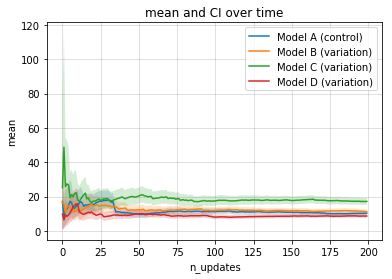

In [10]:
experiment.plot_stats()